# PhyChi - Station Caluire - 11/2011 à 11/2021

Données téléchargé sur le site :  
http://naiades.eaufrance.fr/acces-donnees#/physicochimie  

ID Station Caluire : '06059500'

In [3]:
import pandas as pd

In [4]:
phys_df = pd.read_csv(
    "../../raw_data/phys_caluire_2011_2021/Analyses.CSV",
    sep=';',
    error_bad_lines=False
)

/home/sve/.pyenv/versions/3.8.12/envs/water_pollution/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sve/.pyenv/versions/3.8.12/envs/water_pollution/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
phys_df.shape

(79711, 51)

In [6]:
phys_df.columns

Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'CdSupport',
       'LbSupport', 'CdFractionAnalysee', 'LbFractionAnalysee',
       'CdPrelevement', 'DatePrel', 'HeurePrel', 'DateAna', 'HeureAna',
       'CdParametre', 'LbLongParamètre', 'RsAna', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqAna', 'MnemoRqAna', 'CdInsituAna', 'LbInsituAna',
       'ProfondeurPrel', 'CdDifficulteAna', 'MnemoDifficulteAna', 'LdAna',
       'LqAna', 'LsAna', 'IncertAna', 'CdMetFractionnement',
       'NomMetFractionnement', 'CdMethode', 'NomMethode', 'RdtExtraction',
       'CdMethodeExtraction', 'NomMethodeExtraction', 'CdAccreAna',
       'MnemoAccredAna', 'AgreAna', 'CdStatutAna', 'MnemoStatutAna',
       'CdQualAna', 'LbQualAna', 'CommentairesAna', 'ComResultatAna', 'CdRdd',
       'NomRdd', 'CdProducteur', 'NomProducteur', 'CdPreleveur',
       'NomPreleveur', 'CdLaboratoire', 'NomLaboratoire'],
      dtype='object')

In [8]:
selected_col = [
    'CdStationMesureEauxSurface', # id station
    'LbStationMesureEauxSurface', # label station
    'DatePrel',                   # date mesure
    'LbLongParamètre',            # label de la mesure
    'RsAna',                      # resultat de la mesure
    'SymUniteMesure',             # unité de mesure
    'CdSupport',
]

filtered_phys_df = phys_df[selected_col]


In [25]:
nb_df = filtered_phys_df.groupby('LbLongParamètre')[['CdSupport']].count().sort_values('CdSupport',ascending=False)

In [29]:
# 17 mesures avec plus de 120 mesures sur 10 ans (1 mesure par mois)
nb_df[nb_df['CdSupport'] >= 120]

,CdSupport
LbLongParamètre,
Conductivité à 25°C,182
Oxygène dissous,182
Température de l'Eau,181
Potentiel en Hydrogène (pH),180
Taux de saturation en oxygène,173
Carbone Organique,160
Demande Chimique en Oxygène (DCO),153
Turbidité Formazine Néphélométrique,153
Ammonium,153


In [21]:
temp_df = filtered_phys_df[filtered_phys_df['LbLongParamètre'] == "Température de l'Eau"].sort_values('DatePrel')

In [22]:
temp_df

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DatePrel,LbLongParamètre,RsAna,SymUniteMesure,CdSupport
71038,6059500,SAONE A LYON 1,2011-11-22,Température de l'Eau,10.8,°C,3
35799,6059500,SAONE A LYON 1,2012-01-23,Température de l'Eau,5.9,°C,3
23845,6059500,SAONE A LYON 1,2012-02-14,Température de l'Eau,0.2,°C,3
36719,6059500,SAONE A LYON 1,2012-03-12,Température de l'Eau,9.2,°C,3
51618,6059500,SAONE A LYON 1,2012-04-24,Température de l'Eau,11.5,°C,3
...,...,...,...,...,...,...,...
35789,6059500,SAONE A LYON 1,2021-05-28,Température de l'Eau,15.9,°C,3
53959,6059500,SAONE A LYON 1,2021-06-07,Température de l'Eau,20.0,°C,3
9715,6059500,SAONE A LYON 1,2021-06-25,Température de l'Eau,23.3,°C,3
36336,6059500,SAONE A LYON 1,2021-07-09,Température de l'Eau,20.6,°C,3


In [23]:
import matplotlib.pyplot as plt

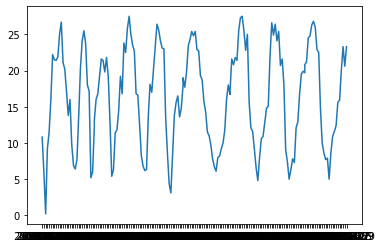

In [24]:
plt.plot(temp_df['DatePrel'],temp_df['RsAna'])
plt.show()